In [ ]:
#import Google dataset
import pandas as pd
import numpy as np
import os
# visualization libraries, seaborn is an extention to matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#pd.set_option("display.max_rows",None,"display.max_columns",None)

#Function to count occurance of letter S in text
def count_s_in_sentence(s)->("s_count"):
    count_s=0
    for ch in s:
        if(ch.lower() =='s'):
            count_s+=1
    return count_s

# function to count amount of vowels in text
def count_vowels_in_sentence(s)->("s_count"):
    
    count_vowel=0    
    vowels='aeiouy'
    
    for ch in s:
        if(ch.lower() in vowels):
            count_vowel+=1
    return count_vowel

#function to count amount of consones in text
def count_consones_in_sentence(s)->("s_count"):
    
    count_consone=0
    vowels='aeiouy'
    
    for ch in s:
        if not (ch.lower() in vowels):
            count_consone+=1
    return count_consone

def change_pathology_to_number(s)->("int_pathology"):
    if(s.lower()=='n'):
        return '0'
    elif(s.lower()=='d'):
        return'1'
    elif(s.lower()=='g'):
        return'2'
    elif(s.lower()=='h'):
        return'3'
    elif(s.lower()=='l'):
        return'4'
    elif(s.lower()=='v'):
        return'5'
    
def define_if_pathology(s)->("int_pathology"):
    if(s.lower()=='n'):
        return '0'
    else:
        return'1'
    
def define_amount_of_words_transcripted(s)->("int_words_transcripted"):
    from difflib import SequenceMatcher

    a = "Papa en Marloes staan op het station. Ze wachten op de trein. Eerst hebben ze een kaartje gekocht. Er stond een hele lange rij, dus dat duurde wel even. Nu wachten ze tot de trein eraan komt. Het is al vijf over drie, dus het duurt nog vier minuten. Er staan nog veel meer mensen te wachten. Marloes kijkt naar links, in de verte ziet ze de trein al aankomen."

    ratio = SequenceMatcher(None, a, s).ratio()
    return ratio


def define_vowels_at_right_place_in_transcription(s)->("int_words_transcripted"):

    c_text = "Papa en Marloes staan op het station. Ze wachten op de trein. Eerst hebben ze een kaartje gekocht. Er stond een hele lange rij, dus dat duurde wel even. Nu wachten ze tot de trein eraan komt. Het is al vijf over drie, dus het duurt nog vier minuten. Er staan nog veel meer mensen te wachten. Marloes kijkt naar links, in de verte ziet ze de trein al aankomen."
    
    vowels_at_right_place = 0
    consones_at_right_place = 0
    
    for ch in s:
        if not (ch.lower() in vowels):
            count_consone+=1
    return count_consone


def get_case_name_from_filename(s)->("case"):
    return s.split('_')[0]

    

Googledataset = pd.read_csv('datasets/datasetGoogle2.csv',header=None,sep=';',decimal=',')
Googledataset = Googledataset.rename(columns={0: 'case', 1: 'transcription', 2: 'confidence', 3:'pathology text',4:'Real text',5:'tool',6:'Correct'})
Googledataset['Correct'] = Googledataset['transcription'].gt(Googledataset['Real text'])
#Googledataset['Amount of S in sentence transcripted']='0'

dataset2 = pd.read_csv('randomforest/dataOpgeschoond.csv',sep=',',decimal='.',skiprows = 1,header=None)
dataset2 = dataset2.rename(columns={0:'case',1:'chroma_stft',2:'rmse',3:'spectral_centroid',4:'spectral_bandwidth',5:'rolloff',
                                    6:'zero_crossing_rate',7:'mfcc1',8:'mfcc2',9:'mfcc3',10:'mfcc4',
                                    11:'mfcc5',12:'mfcc6',13:'mfcc7',14:'mfcc8',15:'mfcc9',16:'mfcc10',17:'mfcc11',
                                    18:'mfcc12',19:'mfcc13',20:'mfcc14',21:'mfcc15',22:'mfcc16',23:'mfcc17',24:'mfcc18',25:'mfcc19',26:'mfcc20',27:'label'})
for i, row in dataset2.iterrows():
    dataset2.at[i,'case']=get_case_name_from_filename(row['case'])




for i, row in Googledataset.iterrows():
    Googledataset.at[i,'S in transcripted text']=int(count_s_in_sentence(row['transcription']))
    Googledataset.at[i,'S in Real text']=int(count_s_in_sentence(row['Real text']))
    
    Googledataset.at[i,'vowels in transcripted text']=int(count_vowels_in_sentence(row['transcription']))
    Googledataset.at[i,'vowels in Real text']=int(count_vowels_in_sentence(row['Real text']))
    
    Googledataset.at[i,'consones in transcripted text']=int(count_consones_in_sentence(row['transcription']))
    Googledataset.at[i,'consones in Real text']=int(count_consones_in_sentence(row['Real text']))
    
    Googledataset.at[i,'consones correctly transcripted']=int(count_consones_in_sentence(row['transcription']))/int(count_consones_in_sentence(row['Real text']))*100   
    Googledataset.at[i,'S correctly transcripted percentage']=(int(count_s_in_sentence(row['transcription']))/int(count_s_in_sentence(row['Real text'])))*100   
    Googledataset.at[i,'vowels correctly transcripted percentage']=int(count_vowels_in_sentence(row['transcription']))/int(count_vowels_in_sentence(row['Real text']))*100
    Googledataset.at[i,'pathology']=int(change_pathology_to_number(row['pathology text']))
    Googledataset.at[i,'Correct_int']=int(row['Correct'])
    Googledataset.at[i,'pathology_detected']=int(define_if_pathology(row['pathology text']))
    Googledataset.at[i,'ratio correct words transcripted']=float(define_amount_of_words_transcripted(row['transcription']))



# first I save ùmy dataset with all the calculations
#    Googledataset.to_csv('datasets/datasetGoogle2WithAditionalcalculations.csv',sep=';')

Googledataset=Googledataset.merge(dataset2,on='case',how='left')
Googledataset.to_csv('datasets/fulldataset.csv',sep=';')
    
#Now I remove unnescessary rows for random forest
Googledataset=Googledataset.drop('transcription',axis=1)
Googledataset=Googledataset.drop('pathology text',axis=1)
Googledataset=Googledataset.drop('Real text',axis=1)
Googledataset=Googledataset.drop('tool',axis=1)
Googledataset=Googledataset.drop('Correct',axis=1)
Googledataset=Googledataset.drop('case',axis=1)
Googledataset=Googledataset.drop('label',axis=1)


#dataset2.head(5)
Googledataset.to_csv('datasets/fulldataset.csv',sep=';')
#print(Googledataset)
Googledataset=Googledataset.drop(101)
Googledataset.head(5)


  








,confidence,S in transcripted text,S in Real text,vowels in transcripted text,vowels in Real text,consones in transcripted text,consones in Real text,consones correctly transcripted,S correctly transcripted percentage,vowels correctly transcripted percentage,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.890733,14.0,12.0,94.0,114.0,204.0,245.0,83.265306,116.666667,82.456140,...,-5.738564,-8.239864,8.881476,-5.271298,4.814304,-6.834188,2.742690,-0.968526,-0.898997,-2.506209
1,0.936437,13.0,12.0,100.0,114.0,217.0,245.0,88.571429,108.333333,87.719298,...,0.873587,2.967209,0.054702,0.500937,11.257287,-5.796532,0.581473,-0.285336,0.780839,0.298647
2,0.934523,8.0,12.0,69.0,114.0,152.0,245.0,62.040816,66.666667,60.526316,...,-10.160314,-6.781964,1.398337,-12.372193,5.852801,-8.212138,-4.382645,-2.375373,-5.097301,-0.492338
3,0.819783,4.0,12.0,31.0,114.0,61.0,245.0,24.897959,33.333333,27.192982,...,-10.160314,-6.781964,1.398337,-12.372193,5.852801,-8.212138,-4.382645,-2.375373,-5.097301,-0.492338
4,0.925102,3.0,12.0,13.0,114.0,23.0,245.0,9.387755,25.000000,11.403509,...,-1.966162,-5.692695,1.720981,-8.522770,7.893877,-8.895610,-5.348538,-1.063221,-4.115649,-1.000136


In [ ]:
Googledataset.describe()

,confidence,S in transcripted text,S in Real text,vowels in transcripted text,vowels in Real text,consones in transcripted text,consones in Real text,consones correctly transcripted,S correctly transcripted percentage,vowels correctly transcripted percentage,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,274.000000,274.000000,274.0,274.000000,274.0,274.000000,274.0,274.000000,274.000000,274.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,0.861963,6.645985,12.0,58.996350,114.0,126.010949,245.0,51.433040,55.383212,51.751185,...,-0.828550,-4.268426,3.414158,-6.651972,5.386856,-5.214169,0.287253,-0.618186,-0.353016,-0.048761
std,0.119261,4.747338,0.0,40.613293,0.0,87.277314,0.0,35.623393,39.561150,35.625695,...,4.782821,3.850427,4.139070,4.284900,4.286188,4.166661,4.556964,3.133650,3.247882,4.492471
min,0.228894,0.000000,12.0,0.000000,114.0,4.000000,245.0,1.632653,0.000000,0.000000,...,-12.254006,-16.497470,-8.957103,-19.569922,-8.136802,-15.930112,-8.220355,-9.083312,-8.265202,-7.773803
25%,0.852480,2.000000,12.0,18.000000,114.0,35.500000,245.0,14.489796,16.666667,15.789474,...,-4.115704,-6.781964,1.093388,-9.537857,2.014357,-8.179685,-2.997143,-2.380601,-2.309813,-2.741411
50%,0.907768,6.000000,12.0,60.500000,114.0,132.500000,245.0,54.081633,50.000000,53.070175,...,-1.449760,-4.527451,3.283921,-7.138074,5.040222,-4.634343,-0.154728,-1.063221,-0.535864,-1.000136
75%,0.925350,11.000000,12.0,101.750000,114.0,217.000000,245.0,88.571429,91.666667,89.254386,...,2.470798,-1.511848,6.644120,-3.593731,8.133277,-2.616337,3.112602,1.639826,1.506622,1.871774
max,0.956250,15.000000,12.0,110.000000,114.0,232.000000,245.0,94.693878,125.000000,96.491228,...,16.751359,5.589539,13.932120,4.115695,16.214827,6.295963,15.506280,8.002700,8.398640,16.074244


In [ ]:
Googledataset[['Correct_int', 'pathology']].groupby(['pathology'], as_index=False).mean().sort_values(by='pathology', ascending=False)

,pathology,Correct_int
5,5.0,0.600000
4,4.0,0.407407
3,3.0,0.531915
2,2.0,1.000000
1,1.0,0.534653
0,0.0,0.920455


In [ ]:
Googledataset[['S correctly transcripted percentage', 'pathology']].groupby(['pathology'], as_index=False).mean().sort_values(by='pathology', ascending=False)

,pathology,S correctly transcripted percentage
5,5.0,33.333333
4,4.0,20.679012
3,3.0,34.219858
2,2.0,91.666667
1,1.0,45.957096
0,0.0,90.246212


In [ ]:
Googledataset[['vowels correctly transcripted percentage', 'pathology']].groupby(['pathology'], as_index=False).mean().sort_values(by='pathology', ascending=False)

,pathology,vowels correctly transcripted percentage
5,5.0,31.754386
4,4.0,20.857700
3,3.0,37.066069
2,2.0,86.842105
1,1.0,40.576689
0,0.0,83.771930


In [ ]:
Googledataset[['consones correctly transcripted', 'pathology']].groupby(['pathology'], as_index=False).mean().sort_values(by='pathology', ascending=False)

,pathology,consones correctly transcripted
5,5.0,30.734694
4,4.0,20.498866
3,3.0,36.639166
2,2.0,88.163265
1,1.0,40.387957
0,0.0,83.436920


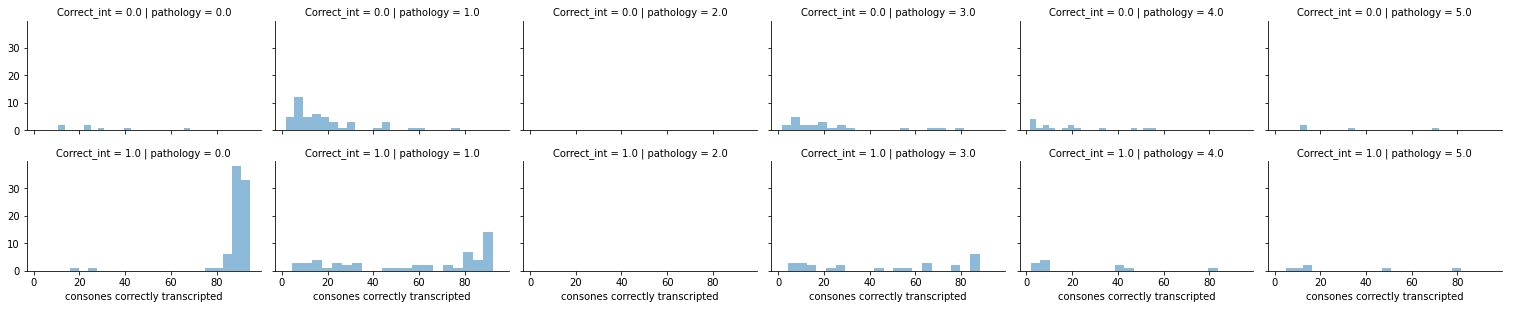

In [ ]:
grid = sns.FacetGrid(Googledataset, col='pathology', row='Correct_int', size=2.2, aspect=1.6)
grid.map(plt.hist, 'consones correctly transcripted', alpha=.5, bins=20)
grid.add_legend();

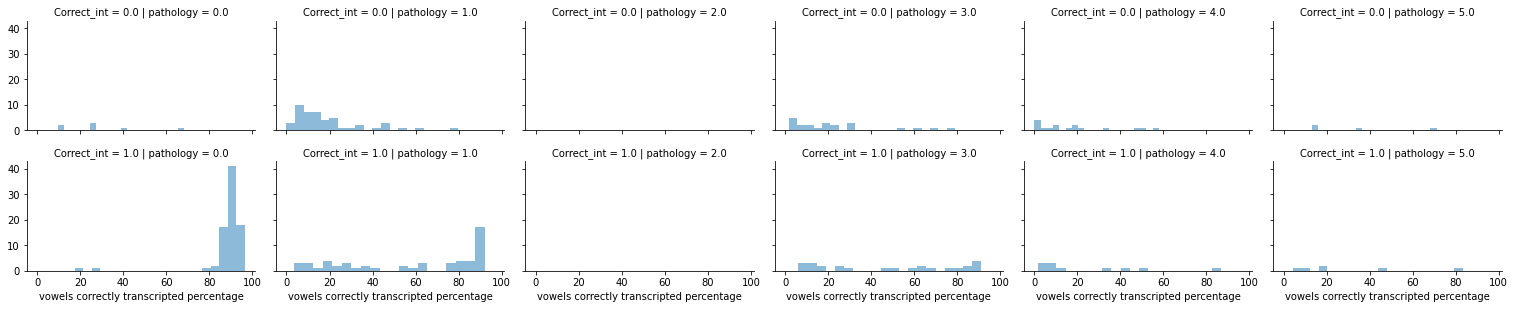

In [ ]:
grid = sns.FacetGrid(Googledataset, col='pathology', row='Correct_int', size=2.2, aspect=1.6)
grid.map(plt.hist, 'vowels correctly transcripted percentage', alpha=.5, bins=20)
grid.add_legend();

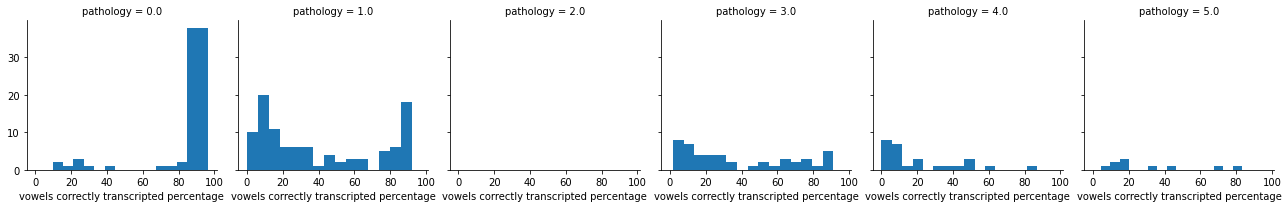

In [ ]:
g = sns.FacetGrid(Googledataset, col='pathology')
g.map(plt.hist, 'vowels correctly transcripted percentage', bins=15)

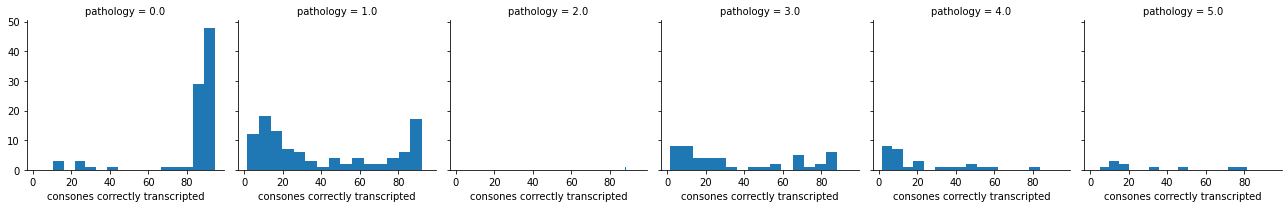

In [ ]:
g = sns.FacetGrid(Googledataset, col='pathology')
g.map(plt.hist, 'consones correctly transcripted', bins=15)

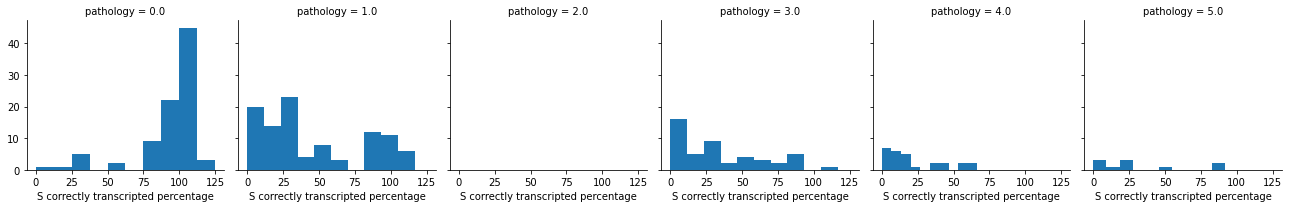

In [ ]:
g = sns.FacetGrid(Googledataset, col='pathology')
g.map(plt.hist, 'S correctly transcripted percentage', bins=10)

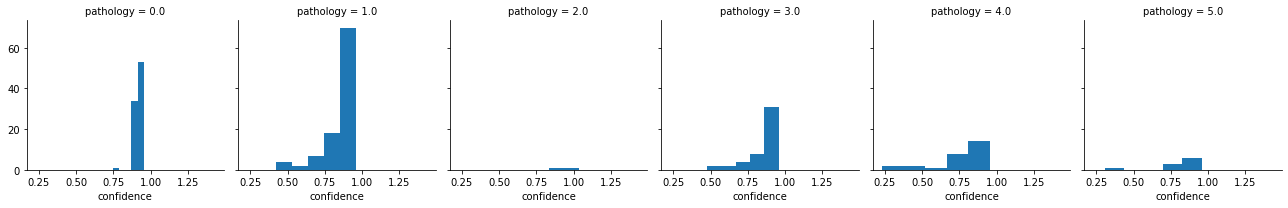

In [ ]:
g = sns.FacetGrid(Googledataset, col='pathology')
g.map(plt.hist, 'confidence', bins=5)

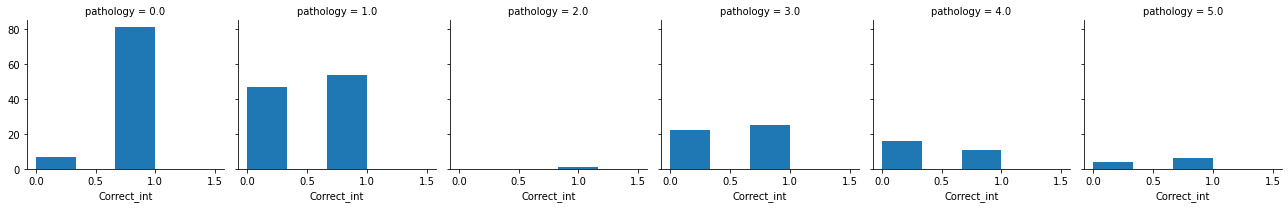

In [ ]:
g = sns.FacetGrid(Googledataset, col='pathology')
g.map(plt.hist, 'Correct_int', bins=3)

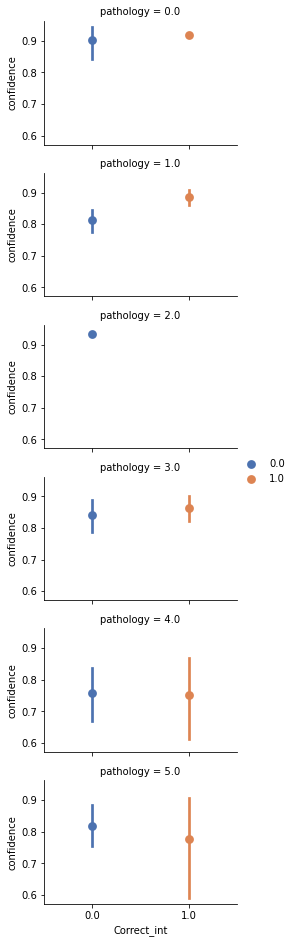

In [ ]:
grid = sns.FacetGrid(Googledataset, row='pathology', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Correct_int', 'confidence', 'Correct_int', palette='deep')
grid.add_legend()

In [ ]:

Y = Googledataset['pathology'].values
Y = Y.astype(int)

Y_2=Googledataset['pathology_detected'].values

X = Googledataset.drop(['pathology'],axis=1)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y_2, test_size = 0.3, random_state = 20)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30, random_state=15)
model.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=30, random_state=15)

In [ ]:
prediction_test = model.predict(X_test)
print(prediction_test)

[0 5 1 0 4 4 0 1 0 0 0 0 1 3 0 0 0 1 4 1 1 3 4 1 1 3 0 4 1 0 3 1 1 0 1 0 1
 1 1 0 1 1 0 4 0 1 1 0 0 4 0 1 0 0 0]


In [ ]:
from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(prediction_test,Y_test))

Accuracy =  0.9454545454545454


In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf',gamma='auto', C=5)
classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)
print("Accuracy = ",metrics.accuracy_score(Y_predict,Y_test))

Accuracy =  0.9272727272727272


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
Y_pred= classifier.predict(X_test)
print("Accuracy = ",metrics.accuracy_score(Y_pred,Y_test))

Accuracy =  0.8


In [ ]:
from sklearn import svm
classif = svm.SVC()
decision_function_shape='ovo'
classif.fit(X_train,Y_train)
predictions = classif.predict(X_test)
print("Accuracy = ",metrics.accuracy_score(predictions,Y_test))



Accuracy =  0.8727272727272727


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 55 points : 11


In [ ]:
#for idx, input, prediction, label in zip(enumerate(X_test), X_test, y_pred, Y_test):
#    if prediction != label:
#        print("No.", idx[0], 'input,',input, ', has been classified as', prediction, 'and should be', label) 

In [ ]:
# Wel of geen pathologie is wel 100% niet nodig is een beetje zever
X = Googledataset.drop(['pathology_detected'],axis=1)
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='scale',C=1)
classifier.fit(X2_train,Y2_train)
Y2_predict = classifier.predict(X2_test)
print("Accuracy = ",metrics.accuracy_score(Y2_predict,Y2_test))

Accuracy =  1.0


In [ ]:
#the best classifier in our case is the svm(rbf) and randomforest now we do it again but with cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=50, random_state=15)
cross_val_score(model,X_train,Y_train,cv=10)


array([0.90909091, 0.95454545, 0.77272727, 0.95454545, 0.77272727,
       0.81818182, 1.        , 0.86363636, 0.9047619 , 0.9047619 ])

In [ ]:
#average with cross validation
cross_val_score(model,X_train,Y_train,cv=5).mean()

0.8947145877378435

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf',gamma='auto', C=5)
cross_val_score(classifier,X_train,Y_train,cv=10)

array([0.90909091, 0.86363636, 0.86363636, 0.95454545, 0.86363636,
       0.81818182, 1.        , 0.81818182, 0.95238095, 0.85714286])

In [ ]:
cross_val_score(classifier,X_train,Y_train,cv=10).mean()

0.89004329004329